In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [9]:
# inspect columns & datatypes for each dataset
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# inspect columns & datatypes for each dataset
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [21]:
# Find the most recent date in the data set / another way.
session.query(func.max(measurement.date)).first()

('2017-08-23',)

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_from = dt.date(2017,8,23) - dt.timedelta(days = 365)


# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp). \
filter(measurement.date >= year_from)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns= ['date', 'precipitation'])


# Sort the dataframe by date
df = df.sort_values('date')

df.head()

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


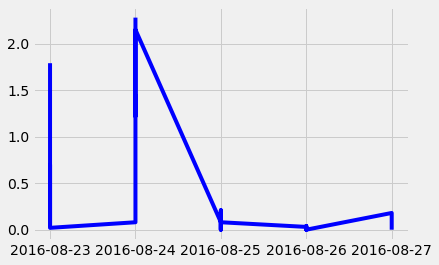

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
x = df['date']
y = df['precipitation']

# Slicing for better view
plt.plot(x[0:30], y[0:30], color = 'b')

plt.show()

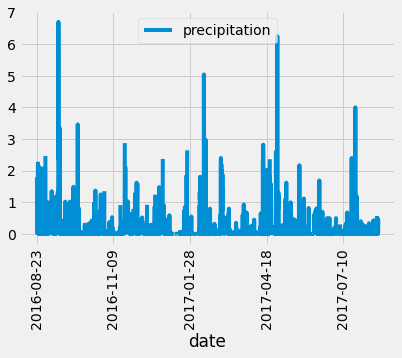

In [24]:
# Use Pandas
df.plot(x='date', y='precipitation', rot=90)

plt.show()

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
              group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), 
              func.max(measurement.tobs), 
              func.avg(measurement.tobs)).\
              filter(measurement.station == 'USC00519281').all()



[(54.0, 85.0, 71.66378066378067)]

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# first, find most recent date of observation 
session.query(func.max(measurement.date)).\
              filter(measurement.station == 'USC00519281').first()


('2017-08-18',)

In [30]:
# Calculate the date one year from the last date in data set for most active station.
year_from1 = dt.date(2017,8,18) - dt.timedelta(days = 365)
year_from1

datetime.date(2016, 8, 18)

In [31]:
# Perform a query to retrieve the data and temperature observation data
results_temp = session.query(measurement.date, measurement.tobs). \
               filter(measurement.date >= year_from1). \
               filter(measurement.station == 'USC00519281').all()

In [32]:
results_temp

[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [33]:
# convert to pandas dataframe to make a histogram
df = pd.DataFrame(results_temp)
df.head()

,0,1
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0


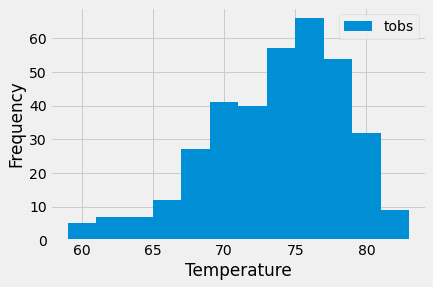

In [34]:
# plot the results as a histogram
x = df[1]
y = df[0]

plt.hist(x, bins=12, label='tobs') # label for legend
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [40]:
startend_date = session.query(func.min(measurement.tobs), 
                 func.max(measurement.tobs), 
                 func.avg(measurement.tobs)).\
                 filter(measurement.date >= '2011-08-23').\
                 filter('2016-08-23' >= measurement.date).all()

startend_date

[(53.0, 86.0, 73.0766818253097)]

# Close session

In [ ]:
# Close Session
session.close()